<a href="https://colab.research.google.com/github/AndreaOmodeo/colab/blob/master/Try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
!pip install pandas==1.1.0
!pip install -Uqq fastai

In [321]:
import pandas as pd
from fastai.tabular.all import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",    
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',  'relationship', 'race'],    
                                  cont_names = ['age', 'fnlwgt', 'education-num'],    
                                  procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [322]:
path=Path('/root')
input_file=path/'training_set_esteso.csv'
dati=pd.read_csv(input_file)
print(dati.shape)
dati.head()

(1562, 247)


,Unnamed: 0,CD_CLIENTE,ID_SOGGETTO,RAGIONE_SOCIALE,IMPORTO_CCC,denominazione,codice_fiscale,partita_iva,natura_giuridica,codice_fiscale.1,id_bilancio,dt_chiusura,cd_struttura,descr_struttura,cd_atto,descr_atto,cod_ateco,cod_tipo_ateco,branca,durata_operativa,sez03_cod_13,sez03_cod_15,sez03_cod_16,sez03_cod_19,sez03_cod_23,sez04_cod_12,sez04_cod_15,sez04_cod_28,sez04_cod_29,sez04_cod_31,sez04_cod_32,sez04_cod_33,sez04_cod_36,sez06_cod_1,sez06_cod_2,sez06_cod_3,sez06_cod_4,sez06_cod_5,sez06_cod_6,sez06_cod_10,...,Prod.55404,Prod.55405,Prod.55406,Prod.55407,Prod.55408,Prod.55420,Prod.55421,Prod.55422,Prod.55423,Prod.55424,Prod.55425,Prod.55426,Prod.55427,Prod.55428,Prod.55429,Prod.55432,Prod.55434,Prod.55445,Prod.55501,Prod.55504,Prod.55506,Prod.55510,Prod.55511,Prod.55512,Prod.55820,Prod.55850,Prod.55851,Prod.55852,Prod.55860,Prod.55911,Prod.55913,Prod.55914,Prod.55915,Prod.55950,Prod.55951,Prod.55952,Prod.55953,Prod.55955,Prod.55957,Prod.55970
0,0,6706598,380368499,HDEMY GROUP,7.50,HDEMY GROUP S.R.L.,4.471710e+09,4.471710e+09,SR,4.471710e+09,29471268.0,2018-12-31 00:00:00,4.0,Societa' di servizi,710.0,BILANCIO DI ESERCIZIO,85599.0,7.0,4.0,12.0,0.0,58.0,0.0,0.0,283.0,6.0,21.0,28.0,79.0,79.0,23.0,33.0,283.0,962.0,0.0,0.0,0.0,962.0,962.0,202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6714863,12060622,SOLAR INNOVA ITALIA,18.75,SOLAR INNOVA ITALIA S.R.L.,1.143583e+10,1.143583e+10,SR,1.143583e+10,30909519.0,2019-12-31 00:00:00,2.0,Societa' commerciali,710.0,BILANCIO DI ESERCIZIO,46692.0,7.0,67.0,12.0,0.0,125.0,0.0,0.0,186.0,7.0,39.0,0.0,128.0,144.0,0.0,3.0,186.0,166.0,0.0,0.0,0.0,166.0,166.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5011095,3697270,GEOM. GIUSEPPE ANGIUS COSTRUZIONI,30.00,GEOM. GIUSEPPE ANGIUS COSTRUZIONI S.R.L.,2.066231e+09,2.066231e+09,SR,2.066231e+09,29749056.0,2018-12-31 00:00:00,3.0,Societa' con produzioni pluriennali,710.0,BILANCIO DI ESERCIZIO,4211.0,7.0,66.0,12.0,0.0,4803.0,1617.0,1447.0,15762.0,169.0,4990.0,304.0,3931.0,9660.0,0.0,381.0,15762.0,5633.0,0.0,0.0,0.0,5633.0,5633.0,1281.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,55230,1553976,GDA,30.00,GDA S.P.A.,1.448341e+09,1.448341e+09,AU,1.448341e+09,30657857.0,2019-12-31 00:00:00,2.0,Societa' commerciali,710.0,BILANCIO DI ESERCIZIO,46392.0,7.0,67.0,12.0,31904.0,26745.0,21673.0,0.0,99913.0,1011.0,10681.0,3168.0,74439.0,74439.0,0.0,3526.0,99913.0,267752.0,0.0,0.0,107.0,267859.0,267752.0,21004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6555906,2698785,BUSINESS ENGINEERING NETWORK,30.00,BUSINESS ENGINEERING NETWORK SRL,1.278432e+10,1.278432e+10,SR,1.278432e+10,30734489.0,2019-12-31 00:00:00,4.0,Societa' di servizi,710.0,BILANCIO DI ESERCIZIO,71122.0,7.0,74.0,12.0,24.0,0.0,0.0,0.0,500.0,0.0,183.0,25.0,70.0,70.0,28.0,55.0,500.0,1087.0,0.0,0.0,0.0,1087.0,1087.0,286.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
dls = TabularDataLoaders.from_csv(input_file, path=path, y_names="IMPORTO_CCC",    
                                  cat_names = ['natura_giuridica', 'descr_struttura','cod_ateco'],    
                                  cont_names = ['acquisti', 
                                    'attivo','c1_cebi', 
                                    'c3_pyln', 'sez06_cod_13', 'c4_sto', 
                                    'c5_cnsl', 
                                    'sez03_cod_15',	'sez03_cod_16',	'sez03_cod_19',	
                                    'sez03_cod_23',	'sez04_cod_12',	'sez04_cod_15', 'sez06_cod_5' ,
                                    'passivo'
                                    ],      
                                  procs = [Categorify, FillMissing, Normalize],
                                  bs=32)

learn = tabular_learner(dls, metrics=rmse, loss_func=F.mse_loss)

In [341]:
dls.show_batch()

,natura_giuridica,descr_struttura,cod_ateco,acquisti_na,attivo_na,c1_cebi_na,c3_pyln_na,sez06_cod_13_na,c4_sto_na,c5_cnsl_na,sez03_cod_15_na,sez03_cod_16_na,sez03_cod_19_na,sez03_cod_23_na,sez04_cod_12_na,sez04_cod_15_na,sez06_cod_5_na,passivo_na,acquisti,attivo,c1_cebi,c3_pyln,sez06_cod_13,c4_sto,c5_cnsl,sez03_cod_15,sez03_cod_16,sez03_cod_19,sez03_cod_23,sez04_cod_12,sez04_cod_15,sez06_cod_5,passivo,IMPORTO_CCC
0,AU,Societa' industriali,254,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.011760e+08,2.225010e+08,49.0,48.0,490.000004,50.0,66.000000,97319.998095,0.000084,2871.000038,222500.999836,11097.999928,108876.999315,220924.000979,2.225010e+08,4803.819824
1,SR,Societa' commerciali,46463,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.078001e+06,5.709000e+06,47.0,56.0,-0.000003,50.0,33.000000,1611.999981,0.000084,-0.000027,5708.999923,11.000002,1755.000373,3948.000511,5.709000e+06,5036.850098
2,SR,Societa' di servizi,4941,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.980011e+05,1.106500e+07,56.0,55.0,-0.000003,50.0,38.000000,6301.000058,195.000059,-0.000027,11065.000633,-12.000012,1250.000610,20101.000315,1.106500e+07,36143.300781
3,SP,Societa' di servizi,4941,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9.723000e+06,2.247280e+08,56.0,52.0,151.000000,50.0,55.000000,23141.999853,20496.999443,-0.000027,224728.002615,5133.000096,81707.000885,92727.001242,2.247280e+08,1889.930054
4,SR,Societa' industriali,292,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.014000e+06,5.221000e+06,36.0,39.0,-0.000003,50.0,45.000000,-0.000151,0.000084,-0.000027,5220.999757,28.999998,122.000040,3455.999882,5.221000e+06,920.000000
5,SU,Societa' commerciali,46463,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.638000e+06,1.624000e+06,54.0,60.0,27.999999,50.0,51.000000,1452.000118,0.000084,-0.000027,1623.998805,-11.000008,58.999688,3686.000868,1.624000e+06,6207.815918
6,SU,Societa' commerciali,453101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.184800e+07,1.103800e+07,47.0,46.0,381.999993,50.0,56.000000,5641.999966,0.000084,59.999972,11038.000653,-404.000006,1226.000355,19582.999257,1.103800e+07,27633.843750
7,SR,Societa' industriali,141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.054000e+06,1.259998e+06,35.0,40.0,-0.000003,50.0,41.000000,215.000337,0.000084,-0.000027,1260.000716,5.999983,28.000521,1516.999515,1.259998e+06,626.440002
8,SO,Societa' commerciali,4631,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,6.788000e+06,5.178001e+06,54.0,55.0,-0.000003,50.0,49.000000,1832.999832,0.000084,-0.000027,5177.999639,132.999992,783.999675,9333.000635,5.178001e+06,-10000.000000
9,SR,Societa' commerciali,46424,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,4.866000e+06,7.510001e+06,50.0,55.0,-0.000003,50.0,35.000001,-0.000151,0.000084,44.999973,7510.000547,49.000001,761.000170,7955.000498,7.510001e+06,5425.540039


In [342]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(8, 5)
    (2): Embedding(415, 47)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=120, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1):

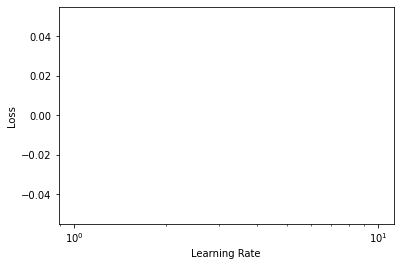

In [343]:
learn.lr_find()

In [344]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,_rmse,time
0,202470992.000000,100197600.000000,10009.875000,00:00
1,209947632.000000,100175456.000000,10008.769531,00:00
2,184483248.000000,99912552.000000,9995.626953,00:00
3,188643904.000000,99009648.000000,9950.359375,00:00
4,170260640.000000,97447728.000000,9871.561523,00:00
5,171631072.000000,96461872.000000,9821.500977,00:00
6,162469056.000000,95446168.000000,9769.654297,00:00
7,177100720.000000,95467512.000000,9770.747070,00:00
8,185790192.000000,95098448.000000,9751.843750,00:00
9,163554240.000000,94601872.000000,9726.349609,00:00


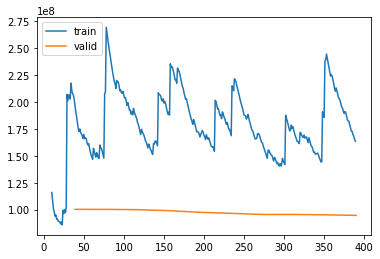

In [345]:
learn.recorder.plot_loss(skip_start=10)

In [329]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,101003528.000000,337591904.000000,18373.675781,00:00


epoch,train_loss,valid_loss,_rmse,time
0,105243848.000000,337570784.000000,18373.101562,00:00
1,102393152.000000,334823360.000000,18298.179688,00:00
2,99701608.000000,337349568.000000,18367.076172,00:00
3,96533848.000000,335499616.000000,18316.648438,00:00


In [278]:
doc(learn.fit_one_cycle)

Learner.fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False)
Fit `self.model` for `n_epoch` using the 1cycle policy.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev
